In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [2]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Features = pd.read_csv('/content/drive/MyDrive/features1_dataset.csv')
Features.head()
# Features.shape

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,labels
0,0.321275,0.729664,0.750033,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,0.000004,0.000003,0.000002,0.000002,0.000005,0.000008,0.000007,0.000005,4.245835e-07,male_neutral
1,0.254110,0.600759,0.597629,0.670451,0.641004,0.629776,0.649909,0.645301,0.699671,0.633312,...,0.000086,0.000066,0.000057,0.000040,0.000033,0.000052,0.000042,0.000030,2.448416e-06,male_happy
2,0.265847,0.668577,0.687229,0.691316,0.724266,0.645240,0.584157,0.595757,0.688347,0.744032,...,0.000010,0.000008,0.000007,0.000010,0.000009,0.000013,0.000014,0.000008,7.894424e-07,male_sad
3,0.267546,0.688829,0.730021,0.708485,0.706601,0.734002,0.700951,0.615528,0.637450,0.679339,...,0.000014,0.000009,0.000015,0.000010,0.000013,0.000016,0.000012,0.000011,1.123394e-06,male_happy
4,0.166879,0.572128,0.591161,0.624055,0.625810,0.631003,0.640990,0.592139,0.621158,0.636863,...,0.001118,0.001387,0.001287,0.001252,0.001699,0.001632,0.000791,0.000358,3.131467e-05,male_happy


In [4]:
from sklearn.utils import shuffle
temp = shuffle(Features)
# temp[:10]

In [5]:
df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]

In [6]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


In [7]:
# !pip install keras.utils
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=ff56f7914ed89140e61b988b5d772107f3cfeb950fbe26fe47a1d7a151d00cbe
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [8]:
import np_utils
import keras.utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = keras.utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.to_categorical(lb.fit_transform(y_test))


In [9]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)


In [10]:
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers


model = models.Sequential()

model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.0001)






In [11]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [67]:

history=model.fit(x_traincnn, y_train, batch_size=156, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
8/8 [==============================] - 2s 247ms/step - loss: 0.1120 - accuracy: 0.9700 - val_loss: 2.1104 - val_accuracy: 0.6375
Epoch 2/200
8/8 [==============================] - 2s 234ms/step - loss: 0.1190 - accuracy: 0.9536 - val_loss: 2.1455 - val_accuracy: 0.6414
Epoch 3/200
8/8 [==============================] - 2s 274ms/step - loss: 0.1350 - accuracy: 0.9545 - val_loss: 2.1762 - val_accuracy: 0.6454
Epoch 4/200
8/8 [==============================] - 2s 300ms/step - loss: 0.1271 - accuracy: 0.9597 - val_loss: 2.2015 - val_accuracy: 0.6534
Epoch 5/200
8/8 [==============================] - 2s 230ms/step - loss: 0.1112 - accuracy: 0.9648 - val_loss: 2.2085 - val_accuracy: 0.6534
Epoch 6/200
8/8 [==============================] - 2s 230ms/step - loss: 0.0974 - accuracy: 0.9657 - val_loss: 2.1987 - val_accuracy: 0.6534
Epoch 7/200
8/8 [==============================] - 2s 226ms/step - loss: 0.0845 - accuracy: 0.9717 - val_loss: 2.4584 - val_accuracy: 0.6494
Epoch 8/200
8

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 152, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 143, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 17, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 17, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                   

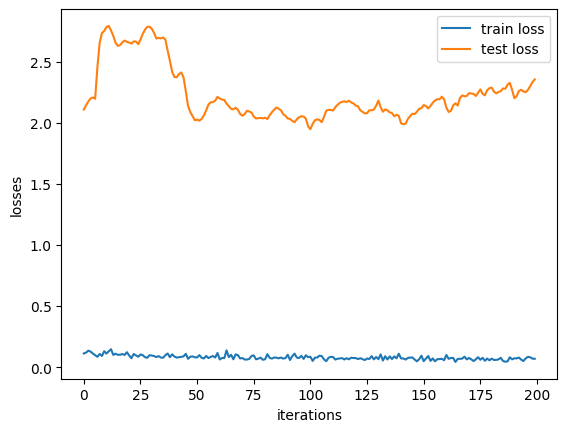

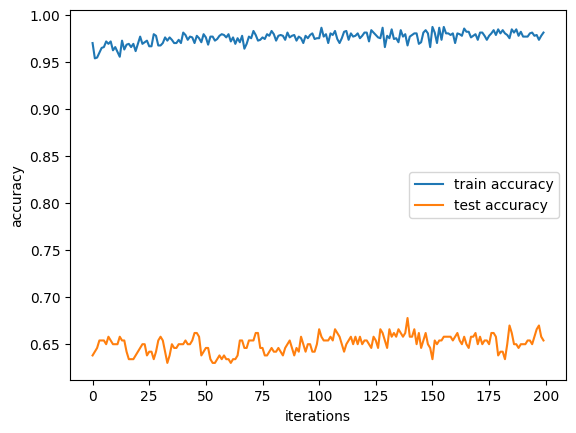

In [68]:
plotter(history)

model.summary()

In [69]:
# Reshape X_test to add the channels dimension
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print("%.2f%%" % (score[1]*100))

65.34%


In [20]:
X_test.shape

(251, 161)

In [15]:
####Predicting#######

In [21]:
data, sampling_rate = librosa.load('/content/output10.wav')

Populating the interactive namespace from numpy and matplotlib


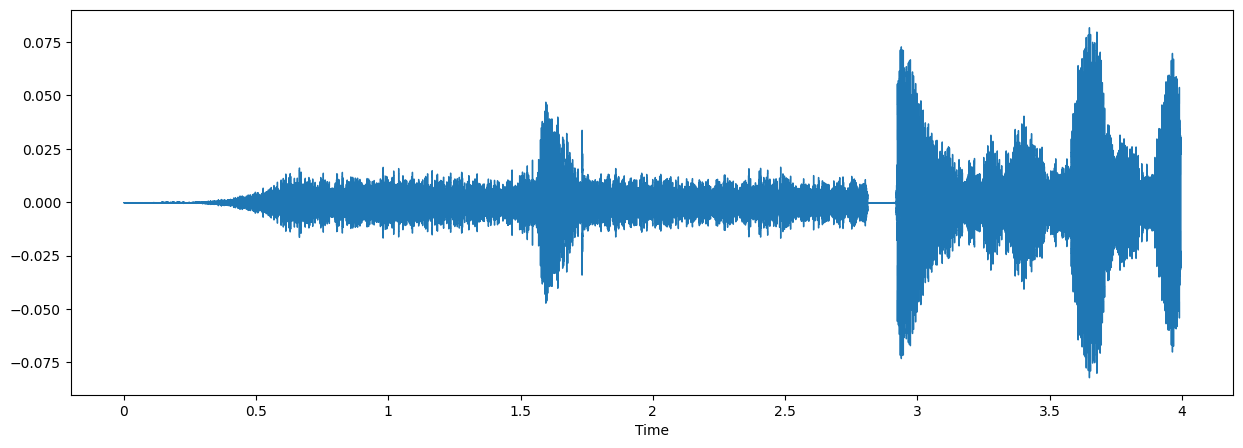

In [22]:
%pylab inline
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [23]:
def extract_features(data,sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)

    return result


In [24]:
featureslive=get_features('/content/output10.wav')

In [25]:
featureslive

array([ 1.23584889e-01,  8.79437566e-01,  7.98272312e-01,  7.05263913e-01,
        6.22534156e-01,  5.71684957e-01,  5.50342619e-01,  5.41927457e-01,
        5.60002446e-01,  6.39740765e-01,  7.51324892e-01,  8.27266335e-01,
        8.29965889e-01, -3.86270111e+02,  1.00199249e+02, -3.26943665e+01,
       -1.30477972e+01, -1.28739080e+01, -3.83631635e+00, -1.70896397e+01,
       -5.27354622e+00, -1.06878586e+01, -1.81362743e+01, -2.19967747e+01,
       -1.51719341e+01, -1.91707363e+01,  3.16696674e-01, -1.06689882e+01,
       -3.40883660e+00, -1.36883059e+01, -3.81265354e+00, -1.89171124e+01,
       -7.06844425e+00,  4.22297262e-06,  1.50351107e-05,  3.59116937e-04,
        2.24827789e-03,  4.04848624e-03,  3.21167568e-03,  4.78306832e-03,
        1.40764751e-02,  2.74033081e-02,  5.54918461e-02,  5.44203110e-02,
        2.32183915e-02,  1.03563489e-02,  7.66771054e-03,  9.60209873e-03,
        9.23483446e-03,  1.13874124e-02,  1.32349925e-02,  4.90873419e-02,
        5.63520715e-02,  

In [27]:
livedf2=featureslive

In [28]:
livedf2= pd.DataFrame(data=livedf2)

In [29]:
livedf2 = livedf2.stack().to_frame().T

In [30]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.123585,0.879438,0.798272,0.705264,0.622534,0.571685,0.550343,0.541927,0.560002,0.639741,...,0.000027,0.000039,0.000047,0.000027,0.000016,0.000017,0.000021,0.000008,0.000003,2.363676e-07


In [31]:
twodim= np.expand_dims(livedf2, axis=2)

In [32]:
# 1. Verify the expected input shape of your model
expected_input_shape = model.layers[0].input_shape
print("Expected input shape:", expected_input_shape)

# 2. Check the shape of your input data
print("Shape of twodim:", twodim.shape)

Expected input shape: (None, 161, 1)
Shape of twodim: (1, 161, 1)


In [33]:
import numpy as np

# Assuming 'twodim' is your original NumPy array and you want a flexible first dimension
batch_size = twodim.shape[0]  # or any other desired batch size
new_shape = (batch_size, *twodim.shape[1:])
reshaped_twodim = np.reshape(twodim, new_shape)

In [34]:
twodim.shape

(1, 161, 1)

In [35]:
livepreds = model.predict(twodim, batch_size=32, verbose=1)

1/1 [==============================] - 0s 160ms/step


In [36]:
livepreds

array([[4.05459345e-04, 5.42334139e-01, 4.88924831e-02, 2.52273516e-04,
        4.04556422e-03, 3.17377634e-02, 1.20452829e-01, 4.21874283e-05,
        1.56375964e-03, 6.96904659e-02, 9.48397279e-01, 1.10160425e-01,
        3.01448815e-03, 2.84952056e-02, 9.84495938e-01, 5.33256168e-03]],
      dtype=float32)

In [37]:
livepreds1=livepreds.argmax(axis=1)

In [38]:
liveabc = livepreds1.astype(int).flatten()

In [39]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_sad'], dtype=object)

In [40]:
preds = model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

8/8 [==============================] - 0s 14ms/step


In [41]:
preds

array([[8.5211408e-01, 1.1905134e-02, 9.5037538e-01, ..., 4.6227492e-06,
        3.8278170e-04, 7.3641341e-04],
       [9.4115186e-01, 1.2518322e-01, 9.7748888e-01, ..., 8.8294248e-05,
        3.6502364e-03, 1.1346389e-01],
       [1.3753171e-04, 4.6436395e-03, 6.3430925e-04, ..., 9.8839802e-01,
        8.9644170e-01, 1.3115016e-01],
       ...,
       [9.8873520e-01, 7.6812664e-03, 9.5183676e-01, ..., 5.9249778e-05,
        1.9984830e-03, 4.6641000e-02],
       [9.9977827e-01, 1.8311657e-04, 9.8952693e-01, ..., 3.3099550e-07,
        6.5523040e-05, 1.8588513e-02],
       [9.5787483e-01, 2.0390978e-02, 9.6667790e-01, ..., 5.1257744e-06,
        5.7897728e-04, 2.8598150e-02]], dtype=float32)

In [42]:
preds1=preds.argmax(axis=1)

In [43]:
preds1

array([ 4,  2,  9, 12,  9,  4, 14, 11,  0,  9,  9,  6, 10, 12,  1,  6,  1,
       15,  0,  0,  6, 13,  2,  7,  9,  3, 14,  6, 15,  3, 12,  4,  6, 12,
       10, 11, 11, 11,  8,  3, 10,  0,  4,  6, 12, 14,  9,  8,  7, 12,  3,
       10,  1, 12, 15, 15,  6,  0, 13,  0,  7, 13,  4,  2,  6, 15, 14,  1,
       14, 14,  9,  9, 14, 15, 15, 10,  5,  7, 11,  9,  8,  6,  7,  3,  0,
        9,  0, 10, 12,  0,  0, 15, 15, 13, 11, 15, 15, 15, 14, 14,  6, 15,
        9,  3,  6,  9, 10,  6,  7,  2,  3, 10,  1, 15,  3,  3,  1, 15, 11,
       14,  0,  4,  1,  0,  9,  6,  9,  8,  3,  2, 14, 15,  0,  3, 12,  1,
        7,  9,  6,  0, 13,  8, 11, 12,  0, 11,  9,  3,  4,  7,  0,  6,  0,
        0,  8,  2, 14,  2,  4,  3, 15,  2,  0, 14,  4,  6,  3,  4,  6, 14,
        0,  8,  9,  8,  3,  4, 15, 15,  6,  8, 10, 10, 10,  7,  1,  9,  8,
        4, 15, 12, 15, 10, 10, 11,  4, 11, 14, 13, 10,  0, 10, 13, 14,  7,
        9, 10,  9, 15,  8, 12, 11,  1,  2,  6,  0, 10,  8,  5,  0, 15,  2,
        7, 14,  7, 10,  0

In [44]:

abc = preds1.astype(int).flatten()
abc

array([ 4,  2,  9, 12,  9,  4, 14, 11,  0,  9,  9,  6, 10, 12,  1,  6,  1,
       15,  0,  0,  6, 13,  2,  7,  9,  3, 14,  6, 15,  3, 12,  4,  6, 12,
       10, 11, 11, 11,  8,  3, 10,  0,  4,  6, 12, 14,  9,  8,  7, 12,  3,
       10,  1, 12, 15, 15,  6,  0, 13,  0,  7, 13,  4,  2,  6, 15, 14,  1,
       14, 14,  9,  9, 14, 15, 15, 10,  5,  7, 11,  9,  8,  6,  7,  3,  0,
        9,  0, 10, 12,  0,  0, 15, 15, 13, 11, 15, 15, 15, 14, 14,  6, 15,
        9,  3,  6,  9, 10,  6,  7,  2,  3, 10,  1, 15,  3,  3,  1, 15, 11,
       14,  0,  4,  1,  0,  9,  6,  9,  8,  3,  2, 14, 15,  0,  3, 12,  1,
        7,  9,  6,  0, 13,  8, 11, 12,  0, 11,  9,  3,  4,  7,  0,  6,  0,
        0,  8,  2, 14,  2,  4,  3, 15,  2,  0, 14,  4,  6,  3,  4,  6, 14,
        0,  8,  9,  8,  3,  4, 15, 15,  6,  8, 10, 10, 10,  7,  1,  9,  8,
        4, 15, 12, 15, 10, 10, 11,  4, 11, 14, 13, 10,  0, 10, 13, 14,  7,
        9, 10,  9, 15,  8, 12, 11,  1,  2,  6,  0, 10,  8,  5,  0, 15,  2,
        7, 14,  7, 10,  0

In [45]:
predictions = (lb.inverse_transform((abc)))

In [46]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_happy
1,female_disgust
2,male_calm
3,male_happy
4,male_calm
5,female_happy
6,male_sad
7,male_fear
8,female_angry
9,male_calm


In [47]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [48]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_happy
1,female_disgust
2,male_calm
3,male_angry
4,male_calm
5,female_surprise
6,male_sad
7,male_fear
8,female_angry
9,male_calm


In [49]:
finaldf = actualdf.join(preddf)

In [50]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_angry,female_angry
171,male_disgust,male_angry
172,male_happy,male_calm
173,male_fear,male_angry
174,female_fear,female_fear
175,female_happy,female_happy
176,male_happy,male_surprise
177,male_surprise,male_surprise
178,female_sad,female_sad
179,male_angry,male_angry


In [51]:
finaldf.to_csv('/content/drive/MyDrive/Predictions1.csv', index=False)